# Value Iteration Networks
## Francesco Saverio Zuppichini

*Authors: Aviv Tamar, Yi Wu, Garrett Thomas, Sergey Levine, and Pieter Abbeel*

# Value Iteration Networks
![title](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/vin.png)

Problem: *Planning* not able to generalise unseen domains 

Solution: A module able to **learn** to plan

# Recap

### Markov Decision Process

is a 5-tuple $(S, A, P, R, \gamma)$ where:

$$
\begin{equation}
        \begin{array}{l}
         \text{finite set of states:} \\
                s \in S \\
         \text{finite set of actions:} \\
        a \in A \\
                 \text{state transition probabilities:} \\
        p(s' | s, a) = Pr \{S_{t + 1} = s' | S_t = s, A_t = a \} \\
                \text{expected reward for state-action-nexstate:}\\
        r(s',s, a) = \mathbb{E}[ R_{t + 1} | S_{t + 1} = s',  S_t = s, A_t = a ]  \\
        \end{array}
\end{equation}
$$

### Reward

$$G_t = \sum_{k = 0}^H \gamma^kr_{t + k + 1}$$

### Value Function

*how good* is to be in a state

$$
V_{\pi}(s) = \mathbb{E}[G_t | S_t = s]
$$

#### Bellman Equation

**recursive** relation

$$\begin{equation}
\begin{array}{l l}
V_{\pi}(s) & = \mathbb{E}_{\pi}\begin{bmatrix}G_t | S_t = s\end{bmatrix} \\
\\
& =  \mathbb{E}_{\pi}\begin{bmatrix}\sum\limits_{k = 0}^{\infty} \gamma^kR_{t + k + 1} | S_t = s \end{bmatrix} \\
\\
...
\\
& = \sum\limits_{a} \pi(a | s) \sum\limits_{s'}\sum\limits_{r} p(s', r | s, a)\begin{bmatrix} r + \gamma V_{\pi}(s')
\end{bmatrix}
\end{array}
\label{eq: value_bellman}
\end{equation}$$

Thus we can **PLAN**

# Value Iteration

![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/value_iteration.jpg)

Does not *generalise*


If we think about 

$$
V_{n + 1}(s) = max_aQ_n(s,a) \quad \forall s
$$

where

$$
Q_n(s,a) = R(s,a) + \gamma \sum_{s'}P(s'|s,a)V_n(s')
$$

It is very similar to a **convolutional** and **max pooling** operation


*paper notation*


If we think about 

$$
V_{n + 1}(s) = \underbrace{max_a}_{\text Max Pooling}Q_n(s,a) \quad \forall s
$$

where

$$
Q_n(s,a) = R(s,a) + \underbrace{\gamma \sum_{s'}P(s'|s,a)}_{\text{Convolution}}V_n(s')
$$


Convolution


$$
h_{l', i', j'} = \sigma(\sum_{l,i,j} W^{l'}_{l,i,j}X_{l, i'-i, j' - j})
$$

Max Pooling

$$
h_{l, i, j} ^{\text{maxpool}} - max_{l', j' \in N(i,j)} h_{l,i',j'}
$$

Thus we can represent Value Iteration with a **CNN**

# Value Iteration Network

![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/3.jpg)

Assume there is a un uknowm $\bar M$, solve it can add info to $\pi$ policy of $M$


We want to learn $ \bar R = f_r(\phi(s)) $ and $ \bar P = f_P(\phi(s)) $ 

$\bar R$ maps an image of the domain to a high reward at the goal and negative near an obstacle

$\bar P$ encodes deterministic movement in the grid-world that do not depend on the observations

Notice that

$$ \bar \pi^* = argmax_{\bar a} \bar R (\bar s, \bar a) + \gamma  \sum_{\bar s'} \bar P (\bar s'| \bar s, \bar a) \bar V^*(\bar s') $$

**local connectivity** the states with $\bar P (\bar s'| \bar s, \bar a)$ small subset of $\bar S$. **Attention**

![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/attention.jpg)


# Value Iteration Module
![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/4.jpg)

$$
Q_{\bar a, i', j'} = \sum_{l, i, j} W^{\bar a}_{l,i,j} \bar R_{l, i' - i, j' - j}
$$

![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/1.jpg)

new $V$ stacked ro $\bar R$ and feed again

# Experiments

## Grid World

![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/6.jpg)


![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/7.jpg)


![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/vis.png)


## Architecture

![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/14.png)

# Mars Rover Navigation

![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/12.jpg)


VIN learn to plan *from natural image input* 

elevation/obstacles data not a part of the input

$84.8%$ success rate

# Continuous Control
![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/10.jpg)


Continuous states and continuous actions

Grid size 28x28

VIN train on coarse grid representation

![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/h.png)
![alt](https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/resources/r.png)


# Conclusion

scalable architecture 

It is able to learn!

easy to implement

#### Does it work?

In [52]:
import torch

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from datasets import GridWorldDataset
from config import *
from utils import *

%matplotlib notebook 
plt.rcParams['figure.figsize'] = (14,4)

In [67]:
world = WORLD_8X8

test_ds = GridWorldDataset(*world, train=False)

/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'model.q' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


<IPython.core.display.Javascript object>


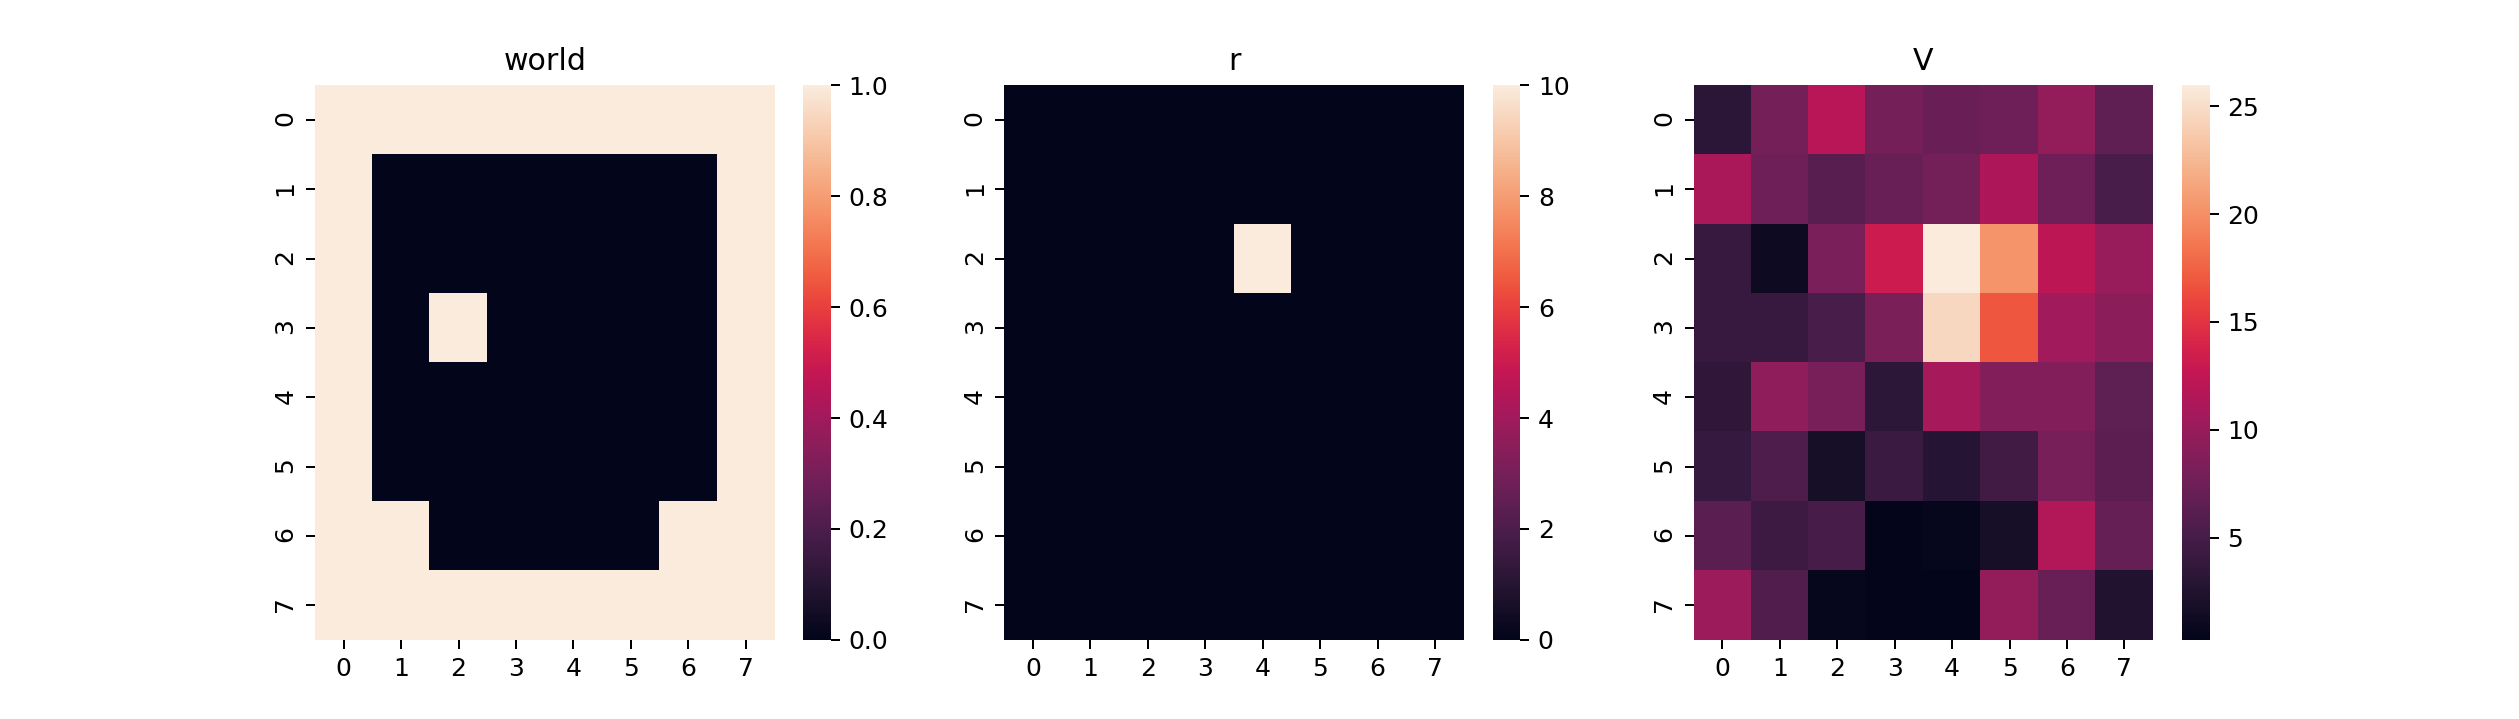

In [72]:
vin = torch.load(get_model_path(world), map_location='cpu')

labels, s1, s2, obs = get_random_data(test_ds, device)

_, v, r_img = vin((s1, s2, obs), k=0)

fig = make_world_r_v_image(obs, v)


<center><img src='https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/core/gridworld_28x28/figures.png'></img></center>

<center>

<center><img src='https://raw.githubusercontent.com/FrancescoSaverioZuppichini/Value-Iteration-Network/master/core/gridworld_28x28/animation.gif'></img></center>


https://github.com/FrancescoSaverioZuppichini/Value-Iteration-Network

In [66]:
print('Thank you')

Thank you
